In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')


In [3]:
df = pd.read_csv("../data/raw/smart_home_energy_consumption_large.csv")

In [4]:
df.head()

,Home ID,Appliance Type,Energy Consumption (kWh),Time,Date,Outdoor Temperature (°C),Season,Household Size
0,94,Fridge,0.20,21:12,02-12-2023,-1.0,Fall,2
1,435,Oven,0.23,20:11,06-08-2023,31.1,Summer,5
2,466,Dishwasher,0.32,06:39,21-11-2023,21.3,Fall,3
3,496,Heater,3.92,21:56,21-01-2023,-4.2,Winter,1
4,137,Microwave,0.44,04:31,26-08-2023,34.5,Summer,5


In [5]:
df.tail()

,Home ID,Appliance Type,Energy Consumption (kWh),Time,Date,Outdoor Temperature (°C),Season,Household Size
99995,124,Microwave,0.42,09:56,28-09-2023,20.5,Summer,1
99996,184,Computer,0.71,12:48,27-05-2023,-5.4,Spring,2
99997,101,Dishwasher,0.25,05:45,18-02-2023,35.6,Winter,3
99998,423,Air Conditioning,2.69,12:39,20-04-2023,3.7,Spring,1
99999,429,Fridge,0.37,18:46,27-02-2023,36.0,Winter,5


In [6]:
df.shape

(100000, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Home ID                   100000 non-null  int64  
 1   Appliance Type            100000 non-null  object 
 2   Energy Consumption (kWh)  100000 non-null  float64
 3   Time                      100000 non-null  object 
 4   Date                      100000 non-null  object 
 5   Outdoor Temperature (°C)  100000 non-null  float64
 6   Season                    100000 non-null  object 
 7   Household Size            100000 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 6.1+ MB


In [8]:
df.isnull().sum()

Home ID                     0
Appliance Type              0
Energy Consumption (kWh)    0
Time                        0
Date                        0
Outdoor Temperature (°C)    0
Season                      0
Household Size              0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df['Appliance Type'].nunique()

10

In [11]:
df['Appliance Type'].value_counts()

Appliance Type
Lights              10201
Dishwasher          10095
Air Conditioning    10067
Heater              10018
Washing Machine      9953
Microwave            9947
Computer             9944
Oven                 9939
Fridge               9931
TV                   9905
Name: count, dtype: int64

In [12]:
df['Energy Consumption (kWh)'].describe()

count    100000.000000
mean          1.499952
std           1.181176
min           0.100000
25%           0.590000
50%           1.230000
75%           1.870000
max           5.000000
Name: Energy Consumption (kWh), dtype: float64

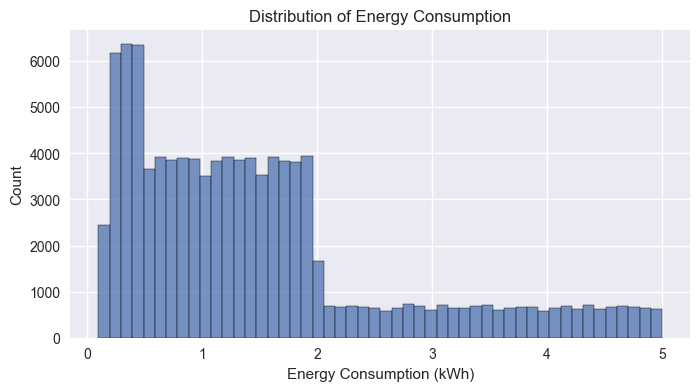

In [13]:
plt.figure(figsize=(8,4))
sns.histplot(df['Energy Consumption (kWh)'], bins=50)
plt.title("Distribution of Energy Consumption")
plt.show()

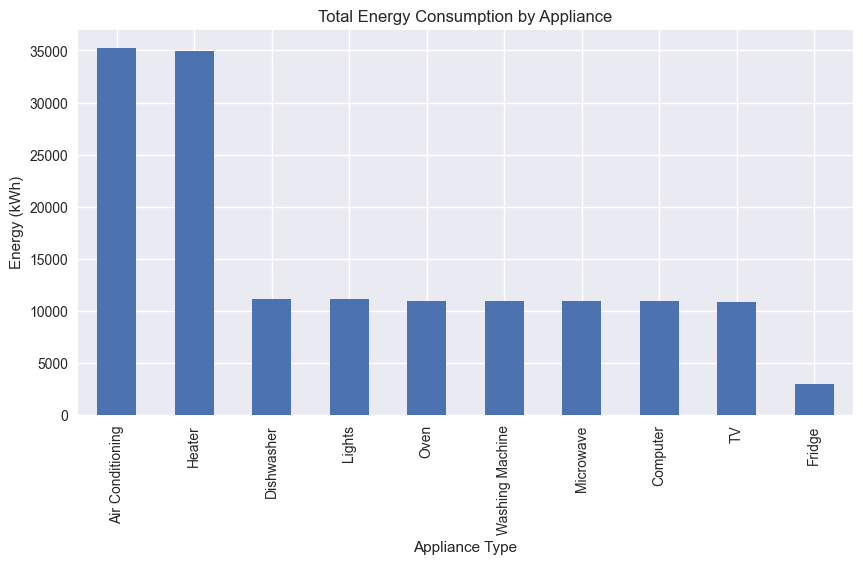

In [14]:
device_energy = df.groupby('Appliance Type')['Energy Consumption (kWh)'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
device_energy.plot(kind='bar')
plt.title("Total Energy Consumption by Appliance")
plt.ylabel("Energy (kWh)")
plt.show()

In [15]:
df['timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

ValueError: time data "21-11-2023 06:39" doesn't match format "%m-%d-%Y %H:%M", at position 2. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [16]:
df['timestamp'] = pd.to_datetime(
    df['Date'] + ' ' + df['Time'],
    dayfirst=True
)

In [17]:
df[['timestamp']].head()

,timestamp
0,2023-12-02 21:12:00
1,2023-08-06 20:11:00
2,2023-11-21 06:39:00
3,2023-01-21 21:56:00
4,2023-08-26 04:31:00


In [18]:
df['timestamp'].dtype

dtype('<M8[ns]')

In [19]:
df = df.drop(['Date', 'Time'], axis=1)
df = df.set_index('timestamp')

In [20]:
df.index.min(), df.index.max()

(Timestamp('2023-01-01 00:07:00'), Timestamp('2024-01-01 23:53:00'))

In [21]:
df.to_csv("../data/processed/device_level.csv")